In [93]:
# Import all libraries 
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import math

from google.colab import files
import io

In [2]:
# Connect to the first dataset
uploaded = files.upload()

Saving owid-co2-data.csv to owid-co2-data.csv


In [3]:
dataset1 = pd.read_csv(io.BytesIO(uploaded["owid-co2-data.csv"]))

In [4]:
dataset1.shape

(25989, 60)

In [5]:
dataset1.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [7]:
# Connect to the first dataset
uploaded = files.upload()

Saving continent.csv to continent (1).csv


In [8]:
dataset2 = pd.read_csv(io.BytesIO(uploaded["continent.csv"]))

In [9]:
dataset2.shape

(262, 6)

In [10]:
dataset2.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0



# **Cleaning**

In [11]:
# Dropping unecessary columns
dataset2 = dataset2.drop(columns = ['Continent_Code', 'Country_Name', 'Two_Letter_Country_Code', 'Country_Number'])

In [15]:
# Renaming columns
dataset2.columns = ['continent', 'Code']

In [20]:
dataset2 = dataset2.rename(columns = {'Code': 'iso_code'})

Merging both Data Frames into one:

In [21]:
# Merging both datasets on the columns 'iso-code' to use dataset with continents on it
dataset = pd.merge(dataset1, dataset2, how = 'inner', on = 'iso_code')

In [22]:
# Dropping the columns we are not using for this analysis
dataset.drop(columns = ['co2_growth_prct', 'co2_growth_abs', 'consumption_co2', 'trade_co2', 'trade_co2_share','co2_per_capita', 'consumption_co2_per_capita', 
                   'share_global_co2', 'cumulative_co2', 'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp', 'co2_per_unit_energy', 
                   'cement_co2_per_capita', 'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita','other_co2_per_capita', 
                   'share_global_coal_co2', 'share_global_oil_co2', 'share_global_gas_co2', 'share_global_flaring_co2', 'share_global_cement_co2', 'cumulative_coal_co2', 
                   'cumulative_oil_co2', 'cumulative_gas_co2', 'cumulative_flaring_co2', 'cumulative_cement_co2', 'share_global_cumulative_coal_co2', 
                   'share_global_cumulative_oil_co2', 'share_global_cumulative_gas_co2', 'share_global_cumulative_flaring_co2', 'share_global_cumulative_cement_co2', 
                   'ghg_per_capita', 'methane_per_capita', 'nitrous_oxide_per_capita', 'energy_per_capita', 'energy_per_gdp'], inplace = True, axis = 1)

In [23]:
# We will work with countries only for this analysis, so we will drop the continents.
dataset =  dataset.loc[dataset['country'] != 'Africa']
dataset =  dataset.loc[dataset['country'] != 'Asia']
dataset =  dataset.loc[dataset['country'] != 'Asia (excl. China & India)']
dataset =  dataset.loc[dataset['country'] != 'Australia']
dataset =  dataset.loc[dataset['country'] != 'Central African Republic']
dataset =  dataset.loc[dataset['country'] != 'EU-27']
dataset =  dataset.loc[dataset['country'] != 'EU-28']
dataset =  dataset.loc[dataset['country'] != 'Europe']
dataset =  dataset.loc[dataset['country'] != 'Europe (excl. EU-27)']
dataset =  dataset.loc[dataset['country'] != 'Europe (excl. EU-28)']
dataset =  dataset.loc[dataset['country'] != 'French Equatorial Africa']
dataset =  dataset.loc[dataset['country'] != 'French West Africa']
dataset =  dataset.loc[dataset['country'] != 'International transport']
dataset =  dataset.loc[dataset['country'] != 'North America']
dataset =  dataset.loc[dataset['country'] != 'North America (excl. USA)']
dataset =  dataset.loc[dataset['country'] != 'South Africa']
dataset =  dataset.loc[dataset['country'] != 'South America']
dataset =  dataset.loc[dataset['country'] != 'World']

In [24]:
# Renaming columns I will use
dataset = dataset.rename(columns={'iso_code': 'Code', 'country':'Country','year':'Year','co2':'CO2','cement_co2':'Cement',
       'coal_co2':'Coal','flaring_co2':'Flaring','gas_co2':'Gas','oil_co2':'Oil','other_industry_co2':'Other industry','total_ghg':'GHG','methane':'Methane','nitrous_oxide':'Nitrous Oxide','primary_energy_consumption':'Primary Energy Consumption','population':'Population','gdp':'GDP', 'continent':'Continent'})

# **Exploratory Analysis**

In [25]:
dataset.head()

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,...,share_global_cumulative_other_co2,GHG,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,Methane,Nitrous Oxide,Population,GDP,Primary Energy Consumption,Continent
0,AFG,Afghanistan,1949,0.015,NaN,0.015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,Asia
1,AFG,Afghanistan,1950,0.084,NaN,0.021,NaN,NaN,0.063,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,Asia
2,AFG,Afghanistan,1951,0.092,NaN,0.026,NaN,NaN,0.066,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,Asia
3,AFG,Afghanistan,1952,0.092,NaN,0.032,NaN,NaN,0.060,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,Asia
4,AFG,Afghanistan,1953,0.106,NaN,0.038,NaN,NaN,0.068,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,Asia


In [27]:
# The columns are we working with?
dataset.columns

Index(['Code', 'Country', 'Year', 'CO2', 'Cement', 'Coal', 'Flaring', 'Gas',
       'Oil', 'Other industry', 'cumulative_other_co2',
       'share_global_other_co2', 'share_global_cumulative_other_co2', 'GHG',
       'total_ghg_excluding_lucf', 'ghg_excluding_lucf_per_capita', 'Methane',
       'Nitrous Oxide', 'Population', 'GDP', 'Primary Energy Consumption',
       'Continent'],
      dtype='object')

In [28]:
# The overall shape 
dataset.shape

(30194, 22)

In [30]:
# The overall type of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30194 entries, 0 to 38973
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Code                               22498 non-null  object 
 1   Country                            30194 non-null  object 
 2   Year                               30194 non-null  int64  
 3   CO2                                28148 non-null  float64
 4   Cement                             14279 non-null  float64
 5   Coal                               20919 non-null  float64
 6   Flaring                            5475 non-null   float64
 7   Gas                                10763 non-null  float64
 8   Oil                                23950 non-null  float64
 9   Other industry                     2812 non-null   float64
 10  cumulative_other_co2               2812 non-null   float64
 11  share_global_other_co2             2812 non-null   flo

Handling nulls:

In [32]:
# Identifing the rows that contain nulls
dataset.isnull().values.any()

True

In [33]:
null_rows = dataset[dataset.isnull().any(axis=1)]
null_rows.head(10)

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,...,share_global_cumulative_other_co2,GHG,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,Methane,Nitrous Oxide,Population,GDP,Primary Energy Consumption,Continent
0,AFG,Afghanistan,1949,0.015,NaN,0.015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,Asia
1,AFG,Afghanistan,1950,0.084,NaN,0.021,NaN,NaN,0.063,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,Asia
2,AFG,Afghanistan,1951,0.092,NaN,0.026,NaN,NaN,0.066,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,Asia
3,AFG,Afghanistan,1952,0.092,NaN,0.032,NaN,NaN,0.060,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,Asia
4,AFG,Afghanistan,1953,0.106,NaN,0.038,NaN,NaN,0.068,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,Asia
5,AFG,Afghanistan,1954,0.106,NaN,0.043,NaN,NaN,0.064,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8151316.0,1.086636e+10,NaN,Asia
6,AFG,Afghanistan,1955,0.154,NaN,0.062,NaN,NaN,0.092,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8270992.0,1.107819e+10,NaN,Asia
7,AFG,Afghanistan,1956,0.183,NaN,0.062,NaN,NaN,0.121,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8398873.0,1.158124e+10,NaN,Asia
8,AFG,Afghanistan,1957,0.293,NaN,0.077,NaN,NaN,0.216,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8535157.0,1.157897e+10,NaN,Asia
9,AFG,Afghanistan,1958,0.330,NaN,0.092,NaN,NaN,0.238,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8680097.0,1.223884e+10,NaN,Asia


In [34]:
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28979 entries, 0 to 38973
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Code                               21283 non-null  object 
 1   Country                            28979 non-null  object 
 2   Year                               28979 non-null  int64  
 3   CO2                                26933 non-null  float64
 4   Cement                             13064 non-null  float64
 5   Coal                               19704 non-null  float64
 6   Flaring                            4260 non-null   float64
 7   Gas                                9548 non-null   float64
 8   Oil                                22735 non-null  float64
 9   Other industry                     1597 non-null   float64
 10  cumulative_other_co2               1597 non-null   float64
 11  share_global_other_co2             1597 non-null   flo

Looks like the majority of nulls are in the key metrics that are calculated global, which makes sense because there are years where there are no key metrics values registred.

In [35]:
dataset.describe()

,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,cumulative_other_co2,share_global_other_co2,share_global_cumulative_other_co2,GHG,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,Methane,Nitrous Oxide,Population,GDP,Primary Energy Consumption
count,30194.000000,28148.000000,14279.000000,20919.000000,5475.000000,10763.000000,23950.000000,2812.000000,2812.000000,2812.000000,2812.000000,5793.000000,5793.000000,5793.000000,5800.000000,5800.000000,2.362500e+04,1.355100e+04,9787.000000
mean,1950.176393,392.926075,18.766405,263.962636,17.025586,143.798269,149.092373,20.841239,414.405502,22.533873,21.993972,199.563549,195.338018,6.705544,40.613066,13.391257,2.172618e+07,2.495490e+11,947.056559
std,56.360209,1543.231926,74.625779,813.913950,32.014497,438.080996,625.618528,38.256954,876.693404,33.215705,32.840369,740.923123,784.173389,7.101979,123.781543,40.973016,8.509331e+07,9.779091e+11,3368.417369
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,-178.710000,0.010000,0.101000,0.000000,0.000000,1.490000e+03,5.543200e+07,0.000000
25%,1918.000000,0.597000,0.142000,0.410000,0.319000,0.475500,0.330000,1.089500,12.812500,0.437500,0.290000,7.470000,6.120000,2.053000,1.750000,0.420000,1.052334e+06,9.999842e+09,6.278000
50%,1965.000000,5.999500,0.673000,5.727000,2.528000,5.042000,2.379500,3.885500,63.395000,2.090000,1.340000,31.670000,26.260000,4.217000,7.890000,3.190000,4.263344e+06,3.073096e+10,48.672000
75%,1994.000000,58.377750,4.184000,63.601000,16.093500,42.429000,21.698000,21.108000,334.168000,32.125000,39.580000,107.170000,87.300000,8.708000,27.955000,9.865000,1.359303e+07,1.283058e+11,305.759000
max,2020.000000,16054.374000,1040.909000,8982.766000,174.364000,4021.047000,6184.459000,213.154000,5761.328000,100.000000,100.000000,11705.810000,12355.240000,53.650000,1242.430000,547.290000,1.439324e+09,1.815162e+13,40404.443000


In [36]:
# Checking for duplicates
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38969    False
38970    False
38971    False
38972    False
38973    False
Length: 30194, dtype: bool

Before we move on, it would be interesting to find out how many different countries exist:

In [37]:
# How many countries?
dataset['Country'].nunique()

230

In [38]:
# Which countries do we have represented?
dataset['Country'].unique()

array(['Afghanistan', 'European Union (27)', 'European Union (28)',
       'High-income countries', 'Kuwaiti Oil Fires', 'Leeward Islands',
       'Low-income countries', 'Lower-middle-income countries', 'Macao',
       'Micronesia (country)', 'Oceania', 'Panama Canal Zone', 'Reunion',
       'Ryukyu Islands', 'St. Kitts-Nevis-Anguilla',
       'Upper-middle-income countries', 'Wallis and Futuna', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', '

In [39]:
# How many continents do we have represented?
dataset['Continent'].nunique()

7

In [40]:
dataset['Continent'].value_counts()

Asia             11286
Europe            7670
Africa            3859
North America     3077
Oceania           2964
South America     1304
Antarctica          34
Name: Continent, dtype: int64

In [42]:
# What years do we have represented?
dataset['Year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 1792, 1793, 1794, 1795, 1796,
       1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807,
       1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818,
       1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829,
       1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840,
       1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851,
       1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862,
       1863, 1864, 1865, 1866, 1867, 1868, 1869, 18

In [46]:
#Checking when emissions started being registred
dataset.Year.min()
print('Key metrics for emissions started being registred in {}.'.format(dataset.Year.min()))

Key metrics for emissions started being registred in 1750.


In [47]:
#Checking when emissions were last updated
dataset.Year.max()
print('Key metrics for emissions were last updated in {}.'.format(dataset.Year.max()))

Key metrics for emissions were last updated in 2020.


Dataset covers the key metrics registred from 1750 all the way to 2020. We are primarly interested in data from 2015 to 2020 for this analysis.

## Cumulative CO2 and GHG emissions per continent

Annual carbon dioxide (CO₂) emissions, measured in tonnes per year. This measures CO₂ emissions from coal, oil, cement, gas, flaring, other industries production only – land use change is not included.

Annual greenhouse gas(GHG) emissions is measured in CO₂ tonnes per year. This measures CO₂ emissions from  methane, nitrous oxide, primary energy consumption.

Text(0.5, 0, 'Year')

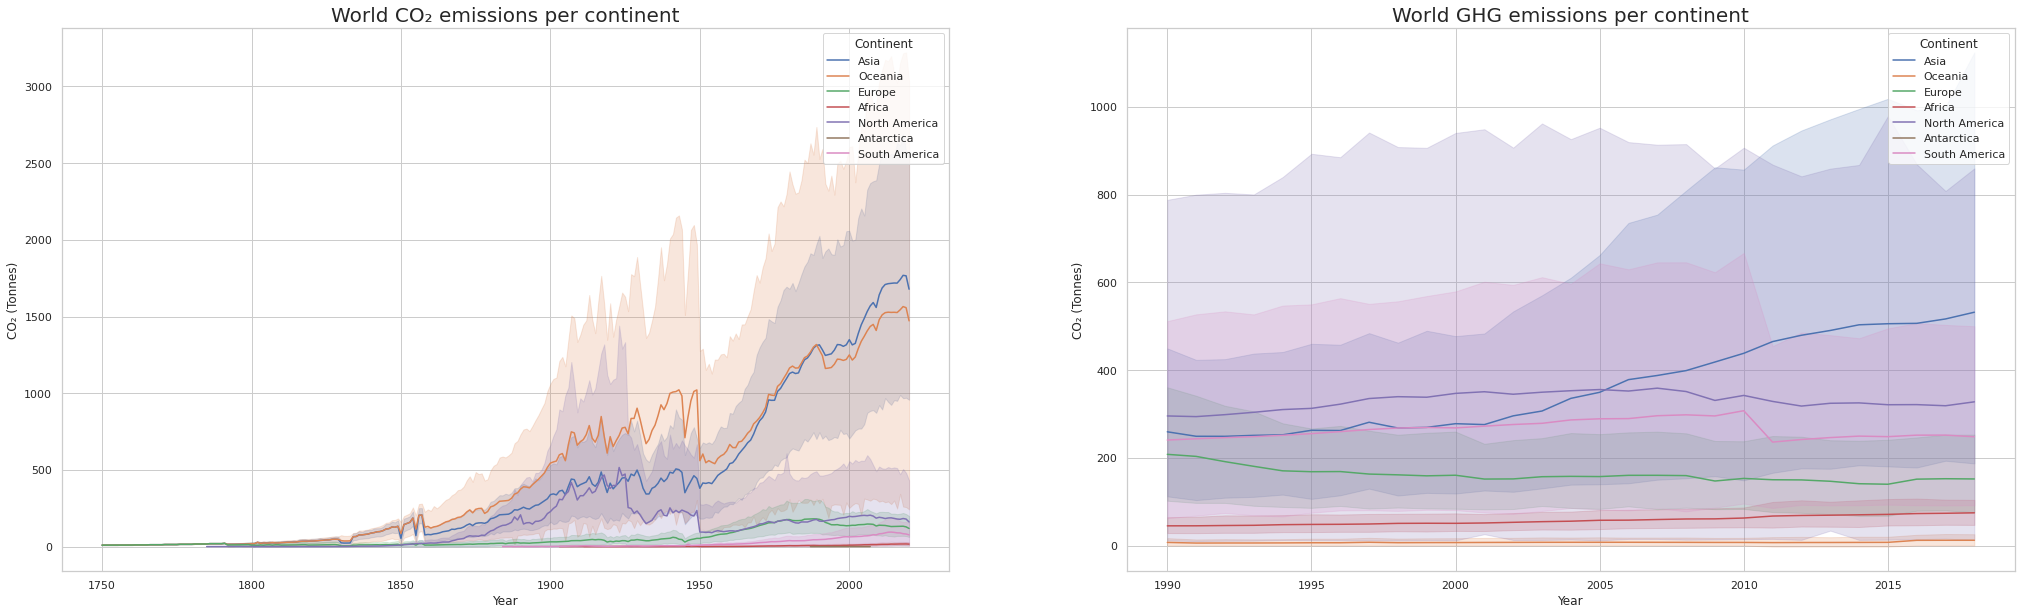

In [50]:
plt.rcParams["figure.figsize"] = (35, 10)
sns.set_style('whitegrid')
plt.subplot (1,2,1)
sns.lineplot(x = "Year",y = "CO2", hue = "Continent", data = dataset)
plt.title("World CO₂ emissions per continent", fontsize = 20)
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

plt.rcParams["figure.figsize"] = (35, 10)
sns.set_style('whitegrid')
plt.subplot (1,2,2)
sns.lineplot(x = "Year",y = "GHG", hue = "Continent", data = dataset)
plt.title("World GHG emissions per continent", fontsize = 20)
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

There is no data for GHG emissions before 1990 and after 2020, but it can be easily be seen that the worst years are the most recent years for both types of emissions.
Further analysis will explore emissions from 2015 to 2020.

## Africa vs. European Union CO₂ emissions (1750-2020)

1. Lead by Europe
2. Europe dip in 1950
3. America takeover in 1985

Text(0.5, 0, 'Year')

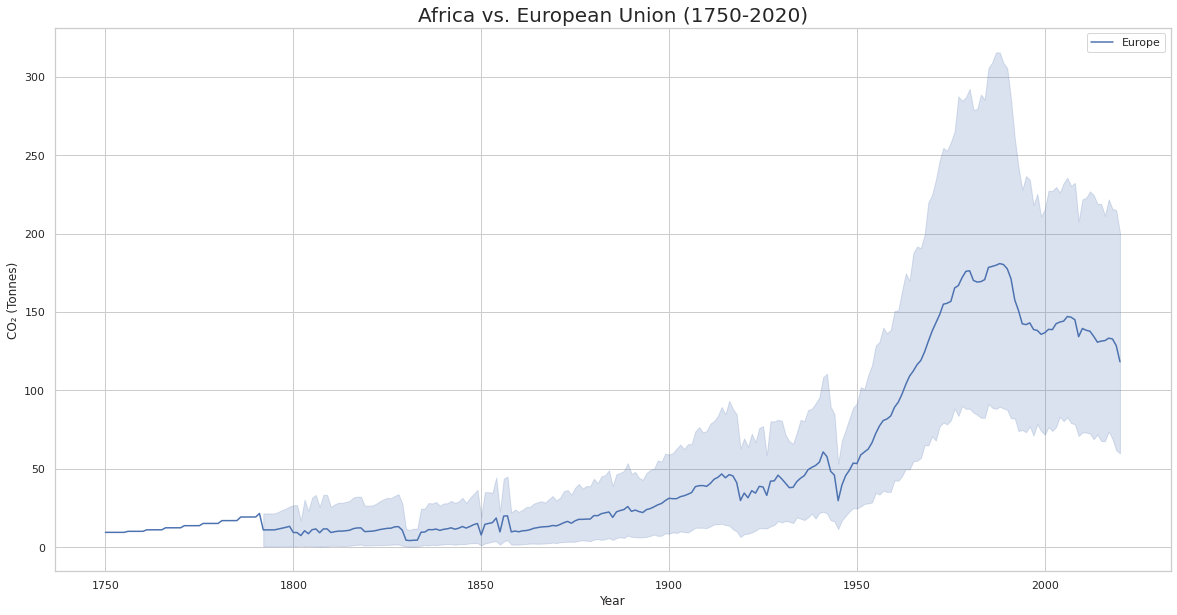

In [55]:
plt.figure(figsize = (20,10))
plt.title("Africa vs. European Union (1750-2020)", fontsize = 20)
sns.lineplot(x  = "Year", y = "CO2", label = "Africa", data = dataset[dataset['Country'] == "Africa"])
sns.lineplot(x  = "Year", y ="CO2", label = "Europe", data = dataset[dataset['Continent'] == "Europe"])
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

## Countrywise cumulative CO₂ and GHG emissions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

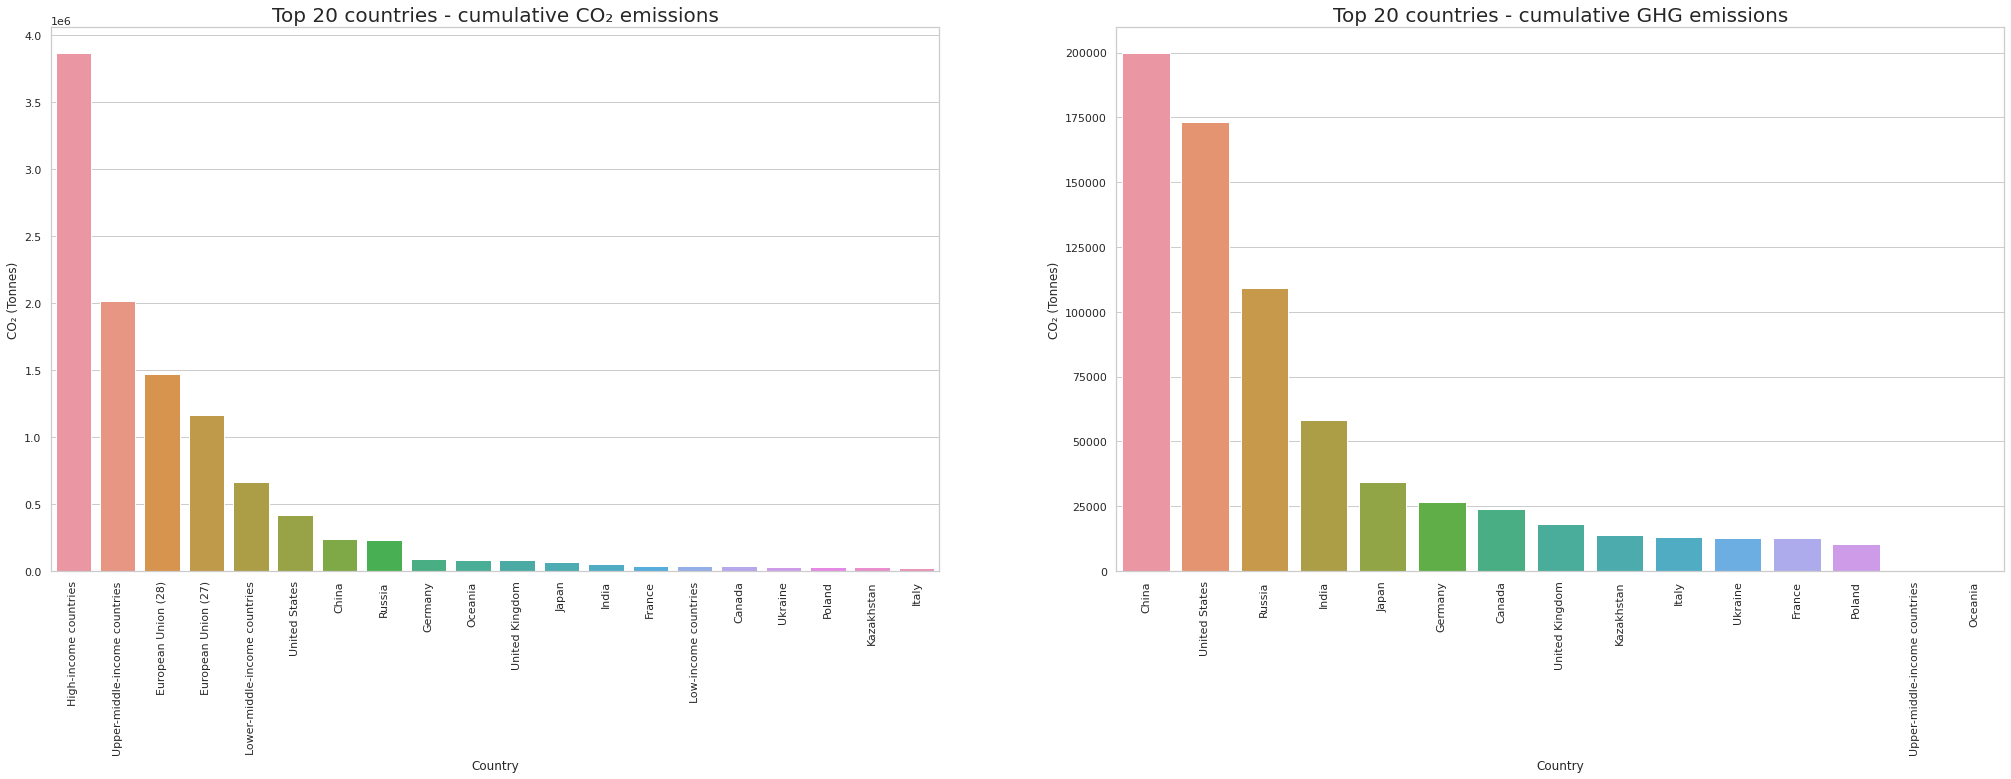

In [57]:
# Let's group data by country
top_dataset = dataset.groupby('Country').sum()
top_dataset.reset_index(inplace = True)

# Let's organize data for CO2 emissions from highest to lowest by Country
top_dataset = top_dataset.sort_values('CO2', ascending = False)
top_dataset = top_dataset.head(20)

# Barchart
plt.rcParams["figure.figsize"] = (35, 10)
sns.set_style('whitegrid')
plt.subplot (1,2,1)
sns.barplot(x = top_dataset['Country'], y = top_dataset['CO2'])
plt.title('Top 20 countries - cumulative CO₂ emissions', fontsize = 20)
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Country')
plt.xticks(rotation = 90)

# Let's organize data for GHG emissions from highest to lowest by Country
top_df2 = top_dataset.sort_values('GHG', ascending = False)
top_df2 = top_df2.head(15)

#barchart
plt.rcParams["figure.figsize"] = (35, 10)
sns.set_style('whitegrid')
plt.subplot (1,2,2)
sns.barplot(x = top_df2['Country'], y = top_df2['GHG'])
plt.title('Top 20 countries - cumulative GHG emissions', fontsize = 20)
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Country')
plt.xticks(rotation = 90)

As expected the two of the modern-day super powers (USA and China) are the largest contributors amongst all other countries. 

Further we will take a closer look to these two countries and analyze their emissions to see how they contribute to climate change.

## Zimbabwe vs. Nigeria Population and GDP (1750-2016)

Text(0.5, 0, 'Year')

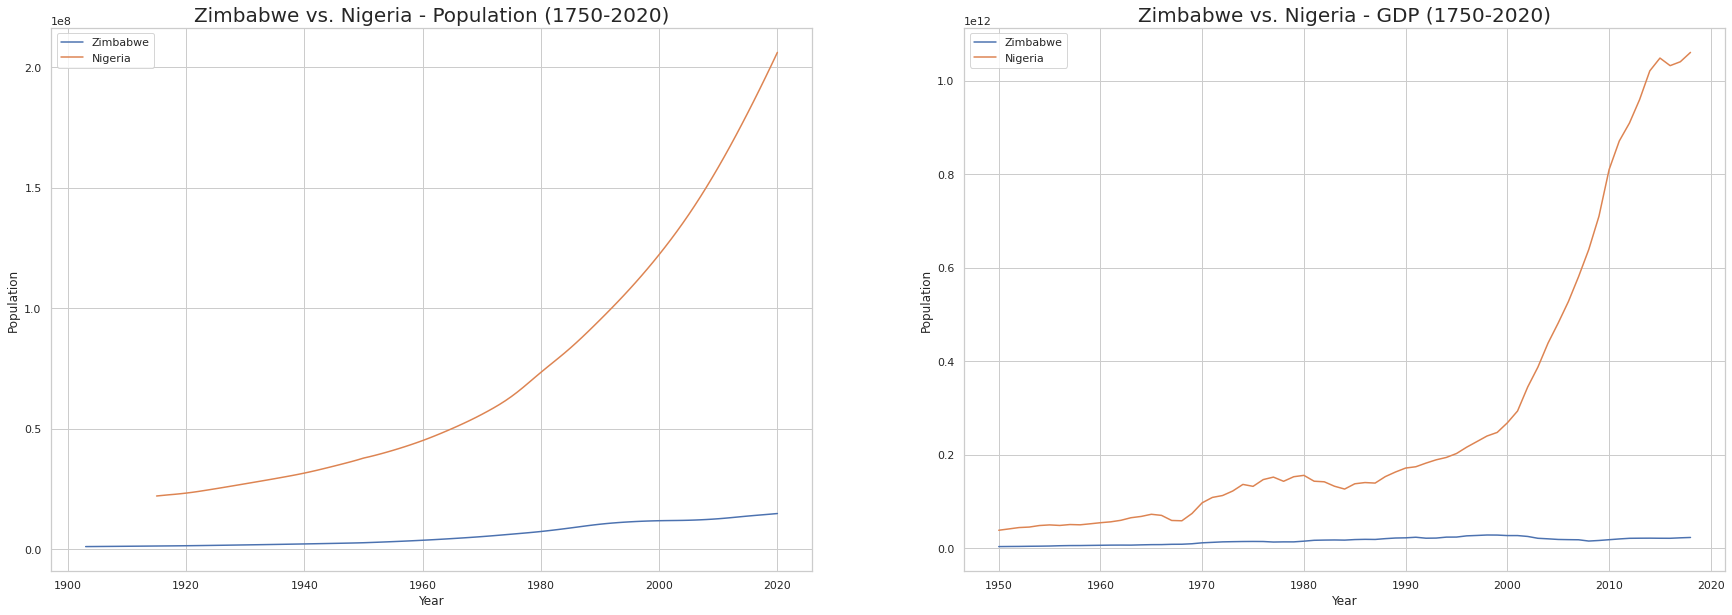

In [60]:
plt.rcParams["figure.figsize"] = (30, 10)
plt.subplot (1,2,1)
plt.title("Zimbabwe vs. Nigeria - Population (1750-2020)", fontsize = 20)
sns.lineplot(x  = "Year", y = "Population", label = "Zimbabwe", data = dataset[dataset['Country'] == "Zimbabwe"])
sns.lineplot(x  = "Year", y ="Population", label = "Nigeria", data = dataset[dataset['Country'] == "Nigeria"])
plt.ylabel('Population')
plt.xlabel('Year')

plt.rcParams["figure.figsize"] = (30, 10)
plt.subplot (1,2,2)
plt.title("Zimbabwe vs. Nigeria - GDP (1750-2020)", fontsize = 20)
sns.lineplot(x  = "Year", y = "GDP", label = "Zimbabwe", data = dataset[dataset['Country'] == "Zimbabwe"])
sns.lineplot(x  = "Year", y ="GDP", label = "Nigeria", data = dataset[dataset['Country'] == "Nigeria"])
plt.ylabel('Population')
plt.xlabel('Year')


## Zimbabwe vs. Nigeria CO₂ and GHG emissions (1750-2020)

Text(0.5, 0, 'Year')

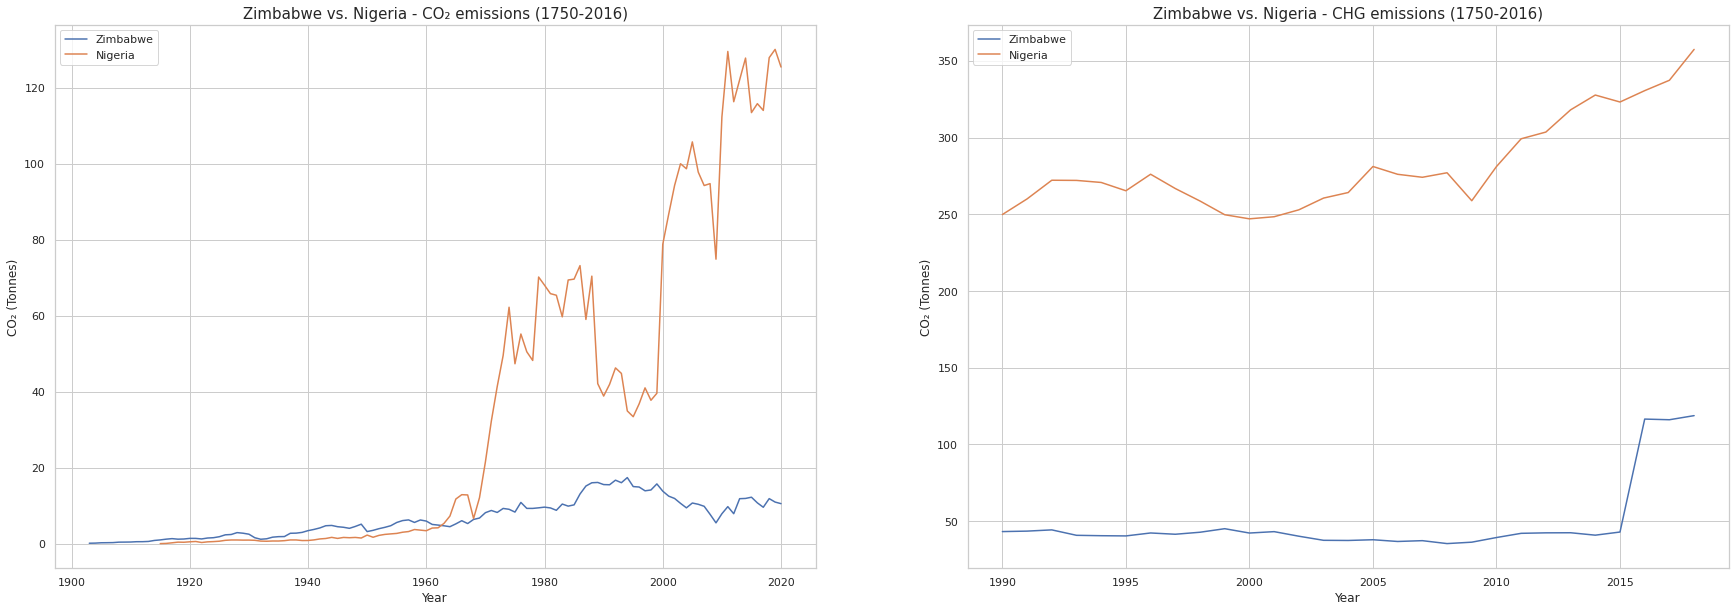

In [61]:
plt.rcParams["figure.figsize"] = (30, 10)
plt.subplot (1,2,1)
plt.title("Zimbabwe vs. Nigeria - CO₂ emissions (1750-2016)", fontsize = 15)
sns.lineplot(x  = "Year", y = "CO2", label = "Zimbabwe", data = dataset[dataset['Country'] == "Zimbabwe"])
sns.lineplot(x  = "Year", y ="CO2", label = "Nigeria", data = dataset[dataset['Country'] == "Nigeria"])
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

plt.rcParams["figure.figsize"] = (30, 10)
plt.subplot (1,2,2)
plt.title("Zimbabwe vs. Nigeria - CHG emissions (1750-2016)", fontsize = 15)
sns.lineplot(x  = "Year", y = "GHG", label = "Zimbabwe", data = dataset[dataset['Country'] == "Zimbabwe"])
sns.lineplot(x  = "Year", y = "GHG", label = "Nigeria", data = dataset[dataset['Country'] == "Nigeria"])
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

# **Data wrengling**

For this analysis we will use information provided between 2015-2020, so we will create a new DataFrame that includes only these years:

In [67]:
# Selecting data for the years between 2015-2020 and creating a new DataFrame with that
years_dataset = dataset[(dataset['Year'] >= 2015) & (dataset['Year'] <= 2020)]
years_dataset.head()

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,...,share_global_cumulative_other_co2,GHG,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,Methane,Nitrous Oxide,Population,GDP,Primary Energy Consumption,Continent
66,AFG,Afghanistan,2015,7.904,0.041,2.843,NaN,0.282,4.738,NaN,...,NaN,93.48,93.73,2.724,76.59,8.59,34413603.0,6.278339e+10,37.012,Asia
67,AFG,Afghanistan,2016,6.745,0.076,2.878,NaN,0.319,3.472,NaN,...,NaN,95.53,95.37,2.695,78.15,9.12,35383028.0,6.429743e+10,34.458,Asia
68,AFG,Afghanistan,2017,6.860,0.045,3.448,NaN,0.300,3.067,NaN,...,NaN,97.45,97.30,2.681,79.61,9.45,36296111.0,6.875280e+10,36.617,Asia
69,AFG,Afghanistan,2018,8.345,0.057,3.849,NaN,0.293,4.146,NaN,...,NaN,99.08,98.92,2.661,81.51,8.96,37171922.0,6.759497e+10,41.989,Asia
70,AFG,Afghanistan,2019,12.147,0.038,7.531,NaN,0.306,4.272,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38041757.0,NaN,35.974,Asia


We are going to drop the nulls in 'CO₂' and 'GHG' columns. Other than that, none of the columns I'm interested for the purpose of this analysis have nulls.

In [68]:
years_dataset['CO2'].dropna()

66        7.904
67        6.745
68        6.860
69        8.345
70       12.147
          ...  
38969    10.738
38970     9.582
38971    11.854
38972    10.949
38973    10.531
Name: CO2, Length: 1572, dtype: float64

In [69]:
years_dataset['GHG'].dropna()

66        93.48
67        95.53
68        97.45
69        99.08
11140      0.20
          ...  
38853     93.23
38968     42.89
38969    116.52
38970    116.09
38971    118.77
Name: GHG, Length: 800, dtype: float64

In [71]:
# Let's do basic statistics analisys on the emissions between 2015-2020
years_dataset[['CO2', 'GHG']].describe()

,CO2,GHG
count,1572.000000,800.000000
mean,768.702080,238.443550
std,2667.331439,951.021371
min,0.007000,-177.030000
25%,1.498500,8.887500
50%,10.853500,39.140000
75%,114.332250,118.680000
max,16054.374000,11705.810000


Text(0.5, 1.0, 'GHG Distribution 2015-2020')

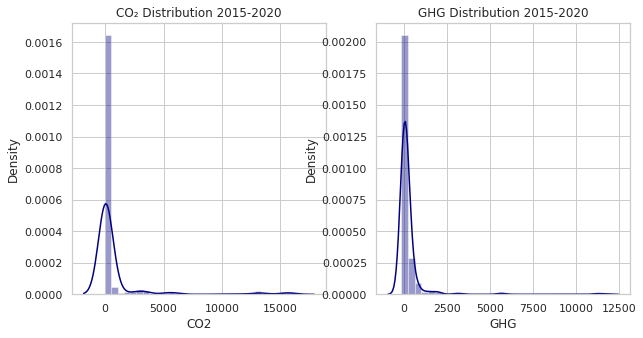

In [72]:
# Let's look at the distribution of CO2 emissions 2015-2020
plt.figure(figsize = (10, 5))
plt.subplot (1,2,1)
ax = sns.distplot(years_dataset['CO2'], bins = 30, color = 'navy')
plt.title('CO₂ Distribution 2015-2020')

# Let's look at the distribution of GHG emissions 2012-2016
plt.subplot (1,2,2)
ax = sns.distplot(years_dataset['GHG'], bins = 30, color = 'navy')
plt.title('GHG Distribution 2015-2020')

# **Hypothesis Testing**


## **Independent Samples T-Test**

**Null hypothesis 1**

There is no statistically significant difference in the mean CO2 emissions for the year of 2015 vs. 2020.

**Null hypothesis 2**

There is no statistically significant difference in the mean CHG emissions for the year of 2015 vs. 2020.




Separating United States and China from the list of countries to prepare for hypothesis testing:

In [73]:
# Creating a Data Frame with key metrics for Zimbabwe
zw = (years_dataset['Country'] == 'Zimbabwe') 
zw_dataset = years_dataset[zw.values]
zw_dataset.head()

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,...,share_global_cumulative_other_co2,GHG,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,Methane,Nitrous Oxide,Population,GDP,Primary Energy Consumption,Continent
38968,ZWE,Zimbabwe,2015,12.226,0.585,8.033,NaN,NaN,3.608,NaN,...,NaN,42.89,31.28,2.264,11.93,6.64,13814642.0,2.102745e+10,54.651,Africa
38969,ZWE,Zimbabwe,2016,10.738,0.639,6.959,NaN,NaN,3.139,NaN,...,NaN,116.52,29.12,2.076,11.50,6.21,14030338.0,2.096179e+10,46.666,Africa
38970,ZWE,Zimbabwe,2017,9.582,0.678,5.665,NaN,NaN,3.239,NaN,...,NaN,116.09,28.80,2.023,11.62,6.35,14236599.0,2.194784e+10,45.936,Africa
38971,ZWE,Zimbabwe,2018,11.854,0.697,7.101,NaN,NaN,4.056,NaN,...,NaN,118.77,31.38,2.173,11.96,6.59,14438812.0,2.271535e+10,47.502,Africa
38972,ZWE,Zimbabwe,2019,10.949,0.697,6.020,NaN,NaN,4.232,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,49.427,Africa


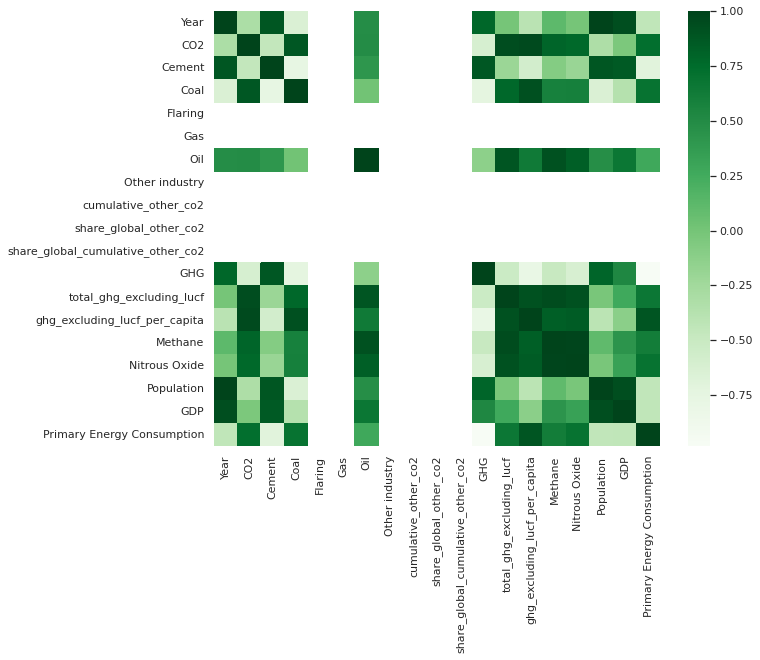

In [74]:
plt.figure(figsize = (10, 8))
sns.heatmap(zw_dataset.corr(), cmap = 'Greens')
plt.show;

In [75]:
# Creating a Data Frame with key metrics for Nigeria
nigeria = (years_dataset['Country'] == 'Nigeria') 
nigeria_dataset = years_dataset[nigeria.values]
nigeria_dataset.head()

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,...,share_global_cumulative_other_co2,GHG,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,Methane,Nitrous Oxide,Population,GDP,Primary Energy Consumption,Continent
30893,NGA,Nigeria,2015,113.470,8.137,0.125,18.635,32.448,54.125,NaN,...,NaN,323.23,277.14,1.530,123.36,34.25,181137454.0,1.048705e+12,459.228,Africa
30894,NGA,Nigeria,2016,115.821,8.525,0.121,15.737,30.881,60.557,NaN,...,NaN,330.64,284.34,1.529,127.06,36.37,185960244.0,1.032470e+12,469.582,Africa
30895,NGA,Nigeria,2017,114.043,7.362,0.121,15.656,32.415,58.488,NaN,...,NaN,337.40,291.17,1.525,126.95,37.41,190873247.0,1.040792e+12,456.439,Africa
30896,NGA,Nigeria,2018,127.928,8.137,0.125,15.348,36.208,68.110,NaN,...,NaN,357.52,311.45,1.590,127.94,37.47,195874685.0,1.060806e+12,484.951,Africa
30897,NGA,Nigeria,2019,130.104,8.137,0.118,15.348,37.818,68.682,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,200963603.0,NaN,498.635,Africa


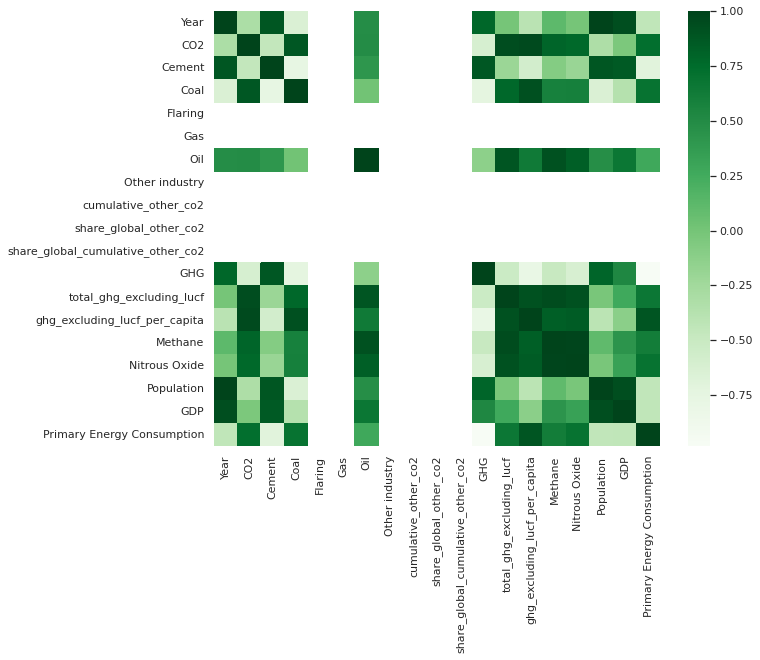

In [76]:
plt.figure(figsize = (10, 8))
sns.heatmap(zw_dataset.corr(), cmap = 'Greens')
plt.show;

Running descriptive statistics on the two samples:

In [77]:
zw_dataset[['CO2', 'GHG']].describe()

,CO2,GHG
count,6.000000,4.000000
mean,10.980000,98.567500
std,0.952042,37.136933
min,9.582000,42.890000
25%,10.582750,97.790000
50%,10.843500,116.305000
75%,11.627750,117.082500
max,12.226000,118.770000


In [78]:
zw_dataset[['CO2', 'GHG']].describe()

,CO2,GHG
count,6.000000,4.000000
mean,10.980000,98.567500
std,0.952042,37.136933
min,9.582000,42.890000
25%,10.582750,97.790000
50%,10.843500,116.305000
75%,11.627750,117.082500
max,12.226000,118.770000


## Zimbabwe vs. Nigeria CO₂ emissions between 2015-2020

Text(0.5, 0, 'Year')

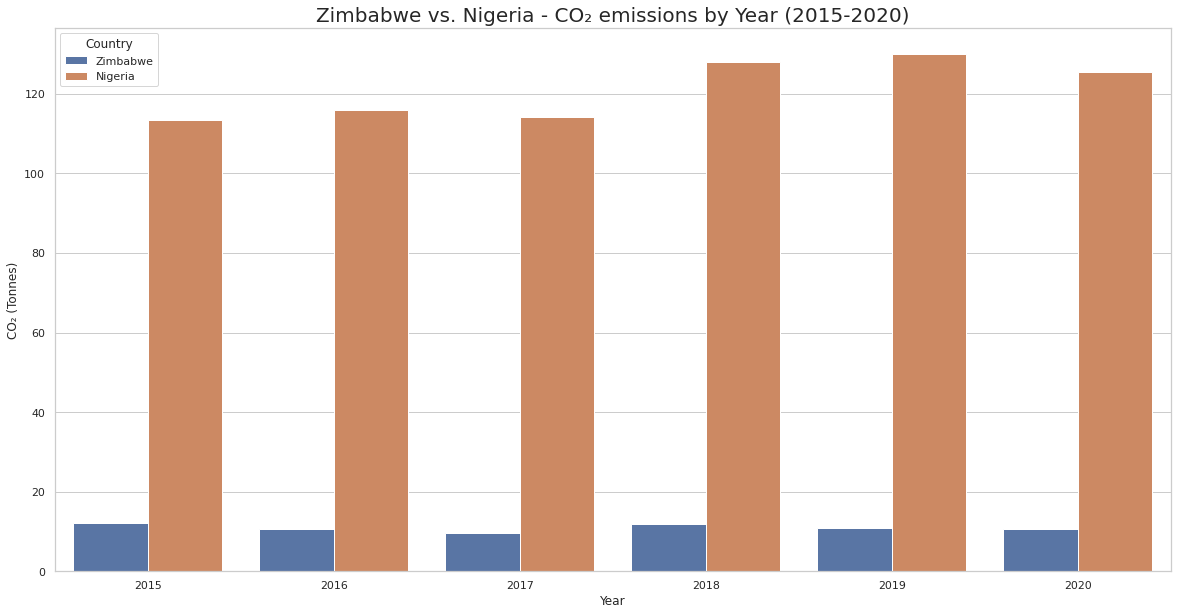

In [79]:
zw_dataset['Country'] = 'Zimbabwe'
nigeria_dataset['Country'] = 'Nigeria'

DATASET = pd.concat([zw_dataset, nigeria_dataset])

plt.figure(figsize = (20,10))
plt.title("Zimbabwe vs. Nigeria - CO₂ emissions by Year (2015-2020)", fontsize = 20)
sns.barplot(data = DATASET, x='Year', y='CO2', hue='Country')
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

## Zimbabwe vs. Nigeria GHG emissions between 2015-2020

Text(0.5, 0, 'Year')

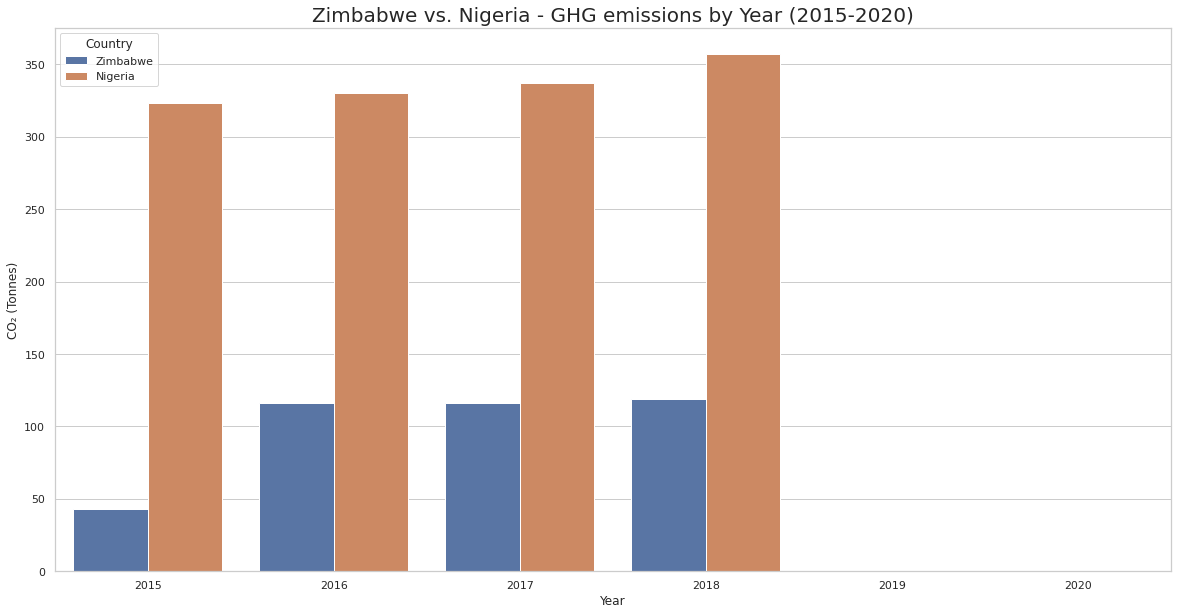

In [80]:
zw_dataset['Country'] = 'Zimbabwe'
nigeria_dataset['Country'] = 'Nigeria'

DF = pd.concat([zw_dataset, nigeria_dataset])


plt.figure(figsize = (20,10))
plt.title("Zimbabwe vs. Nigeria - GHG emissions by Year (2015-2020)", fontsize = 20)
sns.barplot(data = DF, x='Year', y='GHG', hue='Country')
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

## **Carbon Dioxide(CO₂)** Hypothesis 1, Testing

It's time to perform independent samples t-test.

*   Ho: p1 - p2 = 0
*   Ha: p1 - p2 ≠ 0


H₀: There is no statistically significant difference in the mean CO₂ emissions for Zimbabwe vs. Nigeria.

Hₐ: There is statistically significant difference in the mean CO₂ emissions for Zimbabwe vs. Nigeria.



Compare the distributions of the two samples. They appear to be approximately normal.

Text(0.5, 0, 'CO₂ (Tonnes)')

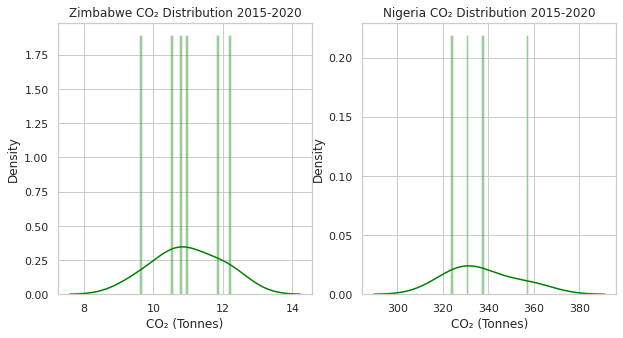

In [83]:
# Let's look at the distribution of CO2 emissions 2015-2020
plt.figure(figsize = (10, 5))
plt.subplot (1,2,1)
ax = sns.distplot(zw_dataset['CO2'], bins = 30, color = 'green',)
plt.title('Zimbabwe CO₂ Distribution 2015-2020')
plt.xlabel('CO₂ (Tonnes)')

# Let's look at the distribution of GHG emissions 2015-2020
plt.subplot (1,2,2)
ax = sns.distplot(nigeria_dataset['GHG'], bins = 30, color = 'green')
plt.title('Nigeria CO₂ Distribution 2015-2020')
plt.xlabel('CO₂ (Tonnes)')

In [84]:
# Hypothesis 1 independent samples t-test
stats.ttest_ind(zw_dataset['CO2'], nigeria_dataset['CO2'])

Ttest_indResult(statistic=-35.60668825960506, pvalue=7.246787328297283e-12)

That's a significant P-value at p =
7.246787328297283e-12. Next, calculate the confidence intervals and Cohen's d:

In [86]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = zw_dataset.shape[0]
sample_2_n = nigeria_dataset.shape[0]
sample_1_mean = zw_dataset['CO2'].mean()
sample_2_mean = nigeria_dataset['CO2'].mean()
sample_1_var = zw_dataset['CO2'].var()
sample_2_var = nigeria_dataset['CO2'].var()


std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+ str(cohens)+ ".")
  
print(get_cohens_d(zw_dataset['CO2'], nigeria_dataset['CO2']))

The difference in means at the 95% confidence interval is between 104.09441805032563 and 116.22191528300769.
Cohen's d is: -20.557531051634065.


How are Carbon Dioxide emissions distributed across Zimbabwe and Nigeria?

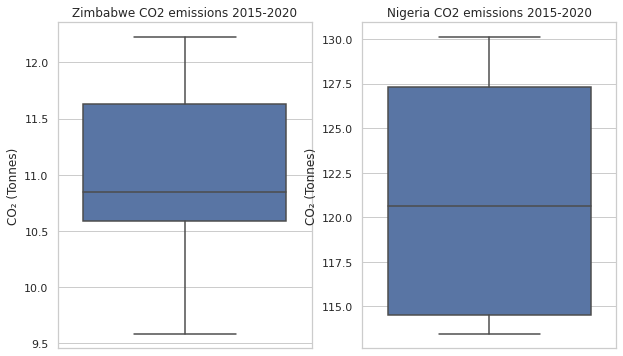

In [87]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.subplot(1,2,1)
sns.boxplot( y = 'CO2', data = zw_dataset)
plt.title('Zimbabwe CO2 emissions 2015-2020')
plt.ylabel('CO₂ (Tonnes)')

plt.rcParams["figure.figsize"] = (10, 6)
plt.subplot(1,2,2)
sns.boxplot( y = 'CO2', data = nigeria_dataset)
plt.title('Nigeria CO2 emissions 2015-2020')
plt.ylabel('CO₂ (Tonnes)')

plt.show;

## Testing Hypothesis 1, Results

Reject the null hypothesis that there is statistical significant difference between mean of CO₂ emissions for Zimbabwe and Nigeria between 2015-2020.

Our p value is very small and the difference between our two means is -61.04 standard deviations, indicating that our difference between CO₂ means is statistically significant and is unlikely to be due to random chance.

## **Greenhouse Gas(GHG)** Hypothesis 2, Testing

*   Ho: p1 - p2 = 0
*   Ha: p1 - p2 ≠ 0

H₀: There is no statistically significant difference in the mean GHG emissions for Zimbabwe vs Nigeria.

Hₐ: There is statistically significant difference in the mean GHG emissions for Zimbabwe vs Nigeria.


Compare the distributions of the two samples. They appear to be approximately normal.

Text(0.5, 0, 'CO₂ (Tonnes)')

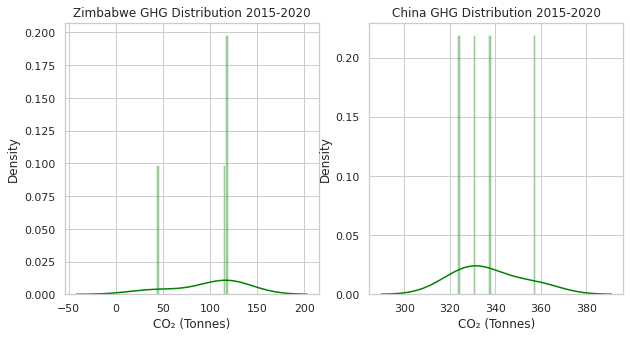

In [89]:
# Let's look at the distribution of CO2 emissions 2015-2020
plt.figure(figsize = (10, 5))
plt.subplot (1,2,1)
ax = sns.distplot(zw_dataset['GHG'], bins = 30, color = 'green')
plt.title('Zimbabwe GHG Distribution 2015-2020')
plt.xlabel('CO₂ (Tonnes)')

# Let's look at the distribution of GHG emissions 2015-2020
plt.subplot (1,2,2)
ax = sns.distplot(nigeria_dataset['GHG'], bins = 30, color = 'green')
plt.title('China GHG Distribution 2015-2020')
plt.xlabel('CO₂ (Tonnes)')

In [90]:
# Hypothesis 2 independent samples t-test
stats.ttest_ind(zw_dataset['GHG'], nigeria_dataset['GHG'])

Ttest_indResult(statistic=nan, pvalue=nan)

That's a significant P-value at p = 2.0474467618870344e-11. Next, calculate the confidence intervals and Cohen's d:

In [91]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = zw_dataset.shape[0]
sample_2_n = nigeria_dataset.shape[0]
sample_1_mean = zw_dataset['GHG'].mean()
sample_2_mean = nigeria_dataset['GHG'].mean()
sample_1_var = zw_dataset['GHG'].var()
sample_2_var = nigeria_dataset['GHG'].var()


std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")
  
print(get_cohens_d(zw_dataset['GHG'], nigeria_dataset['GHG']))

The difference in means at the 95% confidence interval is between 206.66139074077682 and 270.59860925922317.
Cohen's d is: -8.446888117476208.


How are Greenhouse Gas emissions distributed across Zimbabwe and China?

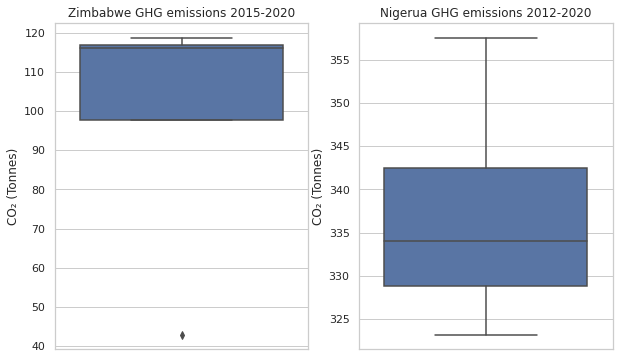

In [92]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.subplot(1,2,1)
sns.boxplot(y = 'GHG', data = zw_dataset)
plt.title('Zimbabwe GHG emissions 2015-2020')
plt.ylabel('CO₂ (Tonnes)')


plt.subplot(1,2,2)
sns.boxplot( y = 'GHG', data = nigeria_dataset)
plt.title('Nigerua GHG emissions 2012-2020')
plt.ylabel('CO₂ (Tonnes)')

plt.show;